In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [3]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# About the columns

In [5]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [6]:
df['salary'].unique()

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225, 155750,  86373, 125196, 100938, 146500,  93418,
       101299, 231545,  94384, 114778,  98193, 151768, 140096,  70768,
       126621, 108875,  74692, 106639, 103760,  83900, 117704,  90215,
       100135,  75044,  90304,  75243, 109785, 103613,  68404, 100522,
        99418, 111512,  91412, 126320, 146856, 100131,  92391, 113398,
        73266, 150480, 193000,  86100,  84240, 150743, 135585, 144640,
        88825, 122960, 132825, 152708,  88400, 172272, 107008,  97032,
       105128, 105631, 166024, 123683,  84000,  95611, 129676, 102235,
       106689, 133217, 126933, 153303, 127512,  83850, 113543,  82099,
        82600,  81500, 131205, 112429,  82100,  72500, 104279, 105000,
      

In [7]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [8]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object



# EDA

# scatterplot:

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


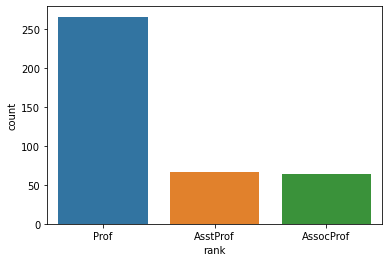

In [9]:
import seaborn as sns
sns.countplot(x="rank",data=df)
print(df["rank"].value_counts())

B    216
A    181
Name: discipline, dtype: int64


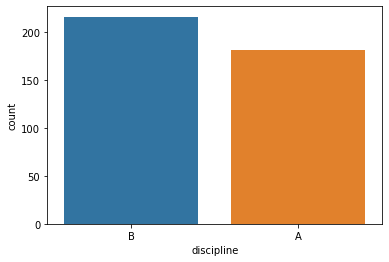

In [10]:
sns.countplot(x="discipline",data=df)
print(df["discipline"].value_counts())

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

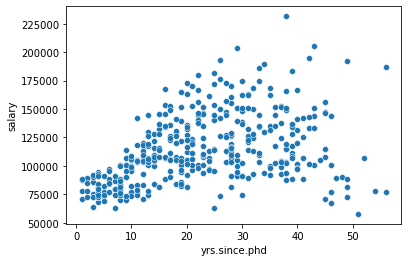

In [11]:
sns.scatterplot(x="yrs.since.phd",y="salary",data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

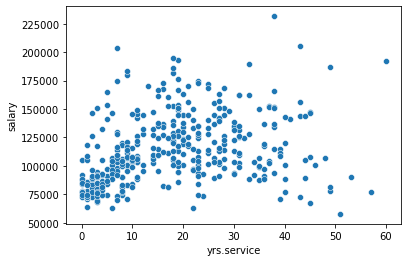

In [12]:
sns.scatterplot(x="yrs.service",y="salary",data=df)

Male      358
Female     39
Name: sex, dtype: int64


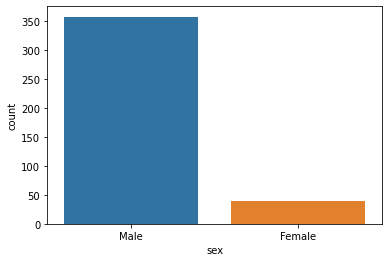

In [13]:
sns.countplot(x="sex",data=df)
print(df["sex"].value_counts())

In [14]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [15]:
df.corr()["salary"].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

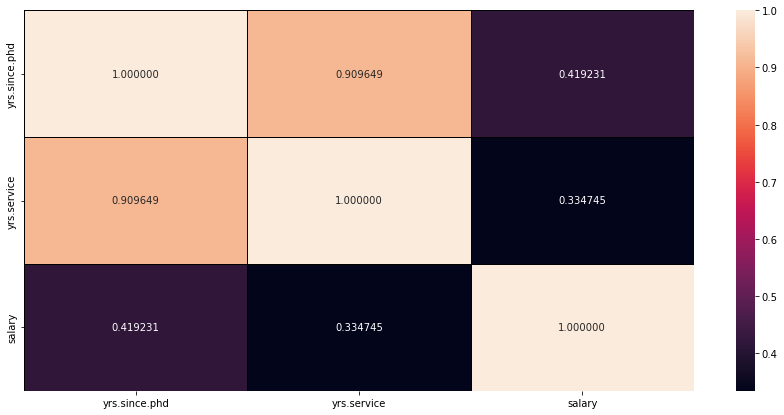

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='2f')

In [17]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [18]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [19]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


# Describing Datasets:

In [20]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    float64
 1   discipline     397 non-null    float64
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    int64  
 4   sex            397 non-null    float64
 5   salary         397 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.7 KB


In [22]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

# Outlayer checking

# Normal Distribution curve

<AxesSubplot:>

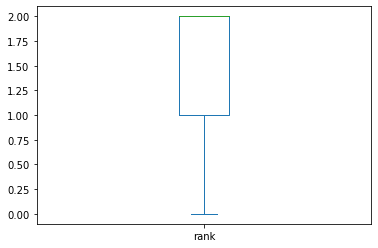

In [23]:
df["rank"].plot.box()

In [24]:
df["descipline"].plot.box()

KeyError: 'descipline'

<AxesSubplot:>

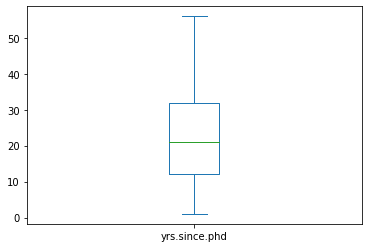

In [25]:
df["yrs.since.phd"].plot.box()

<AxesSubplot:>

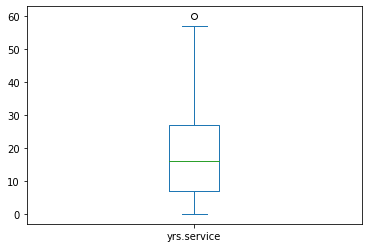

In [26]:
df["yrs.service"].plot.box()

<AxesSubplot:>

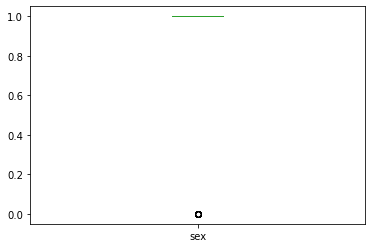

In [27]:
df["sex"].plot.box()

<AxesSubplot:>

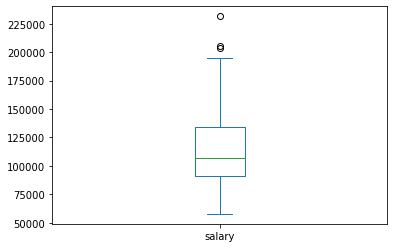

In [28]:
df["salary"].plot.box()

In [29]:
df["sex"].unique()

array([1., 0.])

# Data cleaning

# Removing outlayers

In [30]:
df.shape

(397, 6)

In [31]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(397, 6)

In [32]:
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [33]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [34]:
df_new_z.shape

(354, 6)

In [35]:
data_loss=((397-354)/397)*100
data_loss

10.831234256926953

# Sepatating the columns into features and target:

In [36]:
features=df.drop("salary",axis=1)
target=df["salary"]

In [37]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(target_train,pred_train)}")
    print(f"At random state{i},the training accuracy is :- {r2_score(target_test,pred_test)}")
    print("\n")    
    

At random state0,the training accuracy is :- 0.3611999954853077
At random state0,the training accuracy is :- 0.40792583149752326


At random state1,the training accuracy is :- 0.3604245854198437
At random state1,the training accuracy is :- 0.4163364187662947


At random state2,the training accuracy is :- 0.37547390964955596
At random state2,the training accuracy is :- 0.36001895545266893


At random state3,the training accuracy is :- 0.3847313825130594
At random state3,the training accuracy is :- 0.32935298750108644


At random state4,the training accuracy is :- 0.38517450334380454
At random state4,the training accuracy is :- 0.30440081333156166


At random state5,the training accuracy is :- 0.3950033630150771
At random state5,the training accuracy is :- 0.27529077527747337


At random state6,the training accuracy is :- 0.3650308031752798
At random state6,the training accuracy is :- 0.4018987080607569


At random state7,the training accuracy is :- 0.3575963886324032
At random state7,th

At random state79,the training accuracy is :- 0.34007344678049267
At random state79,the training accuracy is :- 0.5084908819694652


At random state80,the training accuracy is :- 0.34891747740210677
At random state80,the training accuracy is :- 0.5086207408821508


At random state81,the training accuracy is :- 0.35513373474139576
At random state81,the training accuracy is :- 0.4149346606972961


At random state82,the training accuracy is :- 0.37417707170637116
At random state82,the training accuracy is :- 0.3509979602373098


At random state83,the training accuracy is :- 0.377726947712559
At random state83,the training accuracy is :- 0.3236720737678671


At random state84,the training accuracy is :- 0.38401378181768153
At random state84,the training accuracy is :- 0.3127841540168662


At random state85,the training accuracy is :- 0.376142718876315
At random state85,the training accuracy is :- 0.3500612740886737


At random state86,the training accuracy is :- 0.3767878645972712
At rando

In [42]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [43]:
lr.fit(features_train,target_train)

LinearRegression()

In [44]:
pred_test=lr.predict(features_test)

In [45]:
print(r2_score(target_test,pred_test))

0.3439703329785653


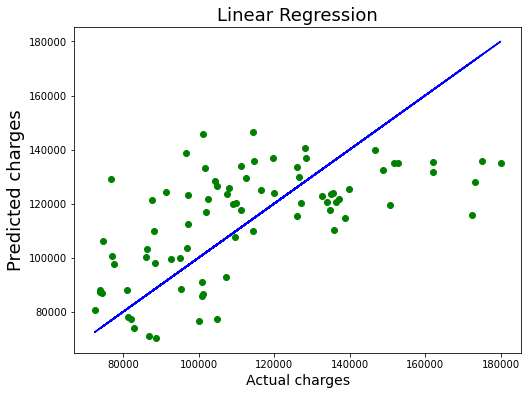

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='g')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=18)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Rgularization

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [57]:
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,10],'random_state':list(range(0,10))}

In [58]:
ls=Lasso()
clf=GridSearchCV(ls_parameters)
clif.fit(features_train,target_train)
print(clif.best_params_)

NameError: name 'ls_parameters' is not defined